In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/survey lung cancer.csv')
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [ ]:
df['LUNG_CANCER'].value_counts()

,count
LUNG_CANCER,
YES,270
NO,39


In [ ]:
df_getdummy=pd.get_dummies(data=df, columns=['GENDER'])
df_getdummy

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,GENDER_F,GENDER_M
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES,False,True
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES,False,True
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO,True,False
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO,False,True
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES,True,False
305,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES,False,True
306,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES,False,True
307,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES,False,True


In [ ]:
sex = {'M': 1, 'F': 0}

# Apply the mapping to the Gender column
df['GENDER'] = df['GENDER'].map(sex)

In [ ]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


from matplotlib import pyplot as plt
df['GENDER'].plot(kind='hist', bins=20, title='GENDER')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['AGE'].plot(kind='hist', bins=20, title='AGE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['SMOKING'].plot(kind='hist', bins=20, title='SMOKING')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['YELLOW_FINGERS'].plot(kind='hist', bins=20, title='YELLOW_FINGERS')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('LUNG_CANCER').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='GENDER', y='AGE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='AGE', y='SMOKING', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='SMOKING', y='YELLOW_FINGERS', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='YELLOW_FINGERS', y='ANXIETY', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['GENDER'].plot(kind='line', figsize=(8, 4), title='GENDER')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['AGE'].plot(kind='line', figsize=(8, 4), title='AGE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['SMOKING'].plot(kind='line', figsize=(8, 4), title='SMOKING')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['YELLOW_FINGERS'].plot(kind='line', figsize=(8, 4), title='YELLOW_FINGERS')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['LUNG_CANCER'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='GENDER', y='LUNG_CANCER', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['LUNG_CANCER'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='AGE', y='LUNG_CANCER', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['LUNG_CANCER'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='SMOKING', y='LUNG_CANCER', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['LUNG_CANCER'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='YELLOW_FINGERS', y='LUNG_CANCER', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
from matplotlib import pyplot as plt
df['AGE'].plot(kind='hist', bins=20, title='AGE')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
x = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
svm_model = SVC(kernel='linear')

In [ ]:
svm_model.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = svm_model.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.967741935483871


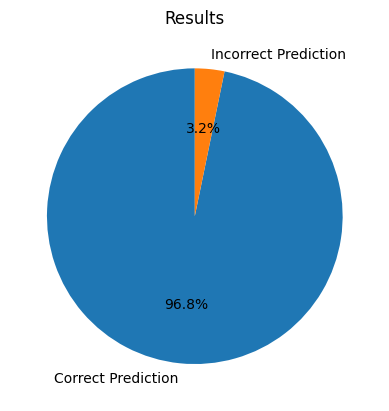

In [ ]:
labels = ['Correct Prediction', 'Incorrect Prediction']
sizes = [accuracy, 1 - accuracy]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Results')
plt.show()

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[ 1  1]
 [ 1 59]]


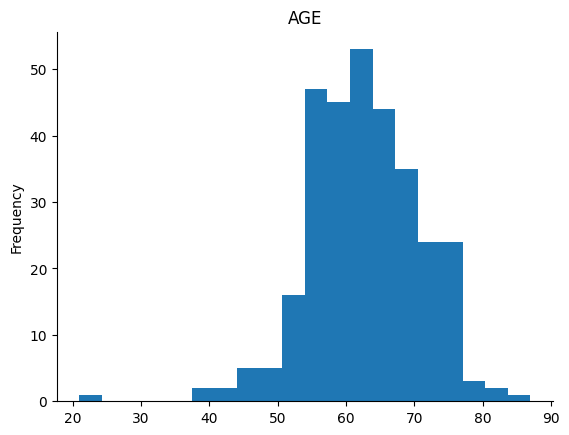

In [ ]:
from matplotlib import pyplot as plt
df['AGE'].plot(kind='hist', bins=20, title='AGE')
plt.gca().spines[['top', 'right',]].set_visible(False)